# Problem Set 3

This problem set is based on lectures 9 and 10. For a complete list of topics please
consult page 2 of the course syllabus. Please consult the “Instructions for Problem
Set Submissions” document under course information before submitting your
assignment.

# Question 1


Introduction:
Special thanks to: https://github.com/justmarkham for sharing the dataset and
materials.
Occupations
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called users
Step 4. Discover what is the mean age per occupation
Step 5. Discover the Male ratio per occupation and sort it from the most to the least
Step 6. For each occupation, calculate the minimum and maximum ages
Step 7. For each combination of occupation and sex, calculate the mean age
Step 8. For each occupation present the percentage of women and men


In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
'''
Basics: Reading Files, Selecting, Filtering, Sorting, Summarizing
'''

# read 'u.user' into 'users'
u_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_table('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', header=None, names=u_cols, sep='|',
                      index_col='user_id')

In [4]:
# examine the users data
users
users.head(10)
users.tail()
users.describe()        # describe any numeric columns
users.index             # "the index" (aka "the labels")
users.columns           # column names (which is "an index")
users.dtypes            # data types of each column
users.values            # underlying numpy array
users.info()            # concise summary

<class 'pandas.core.frame.DataFrame'>
Index: 944 entries, user_id to 943
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         944 non-null    object
 1   gender      944 non-null    object
 2   occupation  944 non-null    object
 3   zip_code    944 non-null    object
dtypes: object(4)
memory usage: 36.9+ KB


In [5]:
# DataFrame vs Series, selecting a column
type(users)
users['gender']
users.gender            # equivalent
type(users.gender)

pandas.core.series.Series

In [6]:
# summarizing a non-numeric column
users.gender.describe()
users.gender.value_counts()

M         670
F         273
gender      1
Name: gender, dtype: int64

In [11]:
# selecting multiple columns
users[['age', 'gender']]
my_cols = ['age', 'gender']
users[my_cols]
type(users[my_cols])

pandas.core.frame.DataFrame

In [15]:
# loc: filter rows by LABEL, and select columns by LABEL
users.loc[1]                        # row with label 1
users.loc[1:3]                      # rows with labels 1 through 3
users.loc[1:3, 'age':'occupation']  # rows 1-3, columns 'age' through 'occupation'
users.loc[:, 'age':'occupation']    # all rows, columns 'age' through 'occupation'
users.loc[[1,3], ['age','gender']]  # rows 1 and 3, columns 'age' and 'gender'

# iloc: filter rows by POSITION, and select columns by POSITION
users.iloc[0]                       # row with 0th position (first row)
users.iloc[0:3]                     # rows with positions 0 through 2 (not 3)
users.iloc[0:3, 0:3]                # rows and columns with positions 0 through 2
users.iloc[:, 0:3]                  # all rows, columns with positions 0 through 2
users.iloc[[0,2], [0,1]]            # 1st and 3rd row, 1st and 2nd column

,age,gender
user_id,,
user_id,age,gender
2,53,F


In [16]:
# mixing: select columns by LABEL, then filter rows by POSITION
users.age[0:3]
users[['age', 'gender', 'occupation']][0:3]

,age,gender,occupation
user_id,,,
user_id,age,gender,occupation
1,24,M,technician
2,53,F,other


In [19]:
# logical filtering
users[users.age < 20]
users.age[users.age < 20]
users[['age', 'occupation']][users.age < 20]
users[(users.age < 20) & (users.gender=='M')]
users[users.occupation.isin(['doctor','lawyer'])]

# sorting
users.age.order()                           # only works for a Series
users.sort_index()                          # sort rows by label
users.sort_index(ascending=False)
users.sort_index(by='age')                  # sort rows by specific column
users.sort_index(by=['occupation', 'age'])  # sort by multiple columns

# detecting duplicate rows
users.duplicated()                                  # Series of logicals
users.duplicated().sum()                            # count of duplicates
users[users.duplicated()]                           # only show duplicates
users[users.duplicated()==False]                    # only show unique rows
users.duplicated(['age','gender','zip_code']).sum() # columns for identifying duplicates

13

In [23]:
# for each occupation, calculate mean age
users.groupby('occupation').age.mean()

# for each occupation, count number of occurrences (excluding NaN)
users.groupby('occupation').occupation.count()
users.occupation.value_counts()

# for each occupation, calculate the min age, max age, and age range
users.groupby('occupation').age.min()
users.groupby('occupation').age.max()
users.groupby('occupation').age.apply(lambda x: x.max() - x.min())

# for each occupation/gender combination, calculate mean age
users.groupby(['occupation','gender']).age.mean()
users.groupby(['gender','occupation']).age.mean()

student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
salesman          12
lawyer            12
none               9
doctor             7
homemaker          7
occupation         1
Name: occupation, dtype: int64

# Question 2

Euro Teams
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address
Step 3. Assign it to a variable called euro12
Step 4. Select only the Goal column
Step 5. How many team participated in the Euro2012?
Step 6. What is the number of columns in the dataset?
Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them
to a dataframe called discipline
Step 8. Sort the teams by Red Cards, then to Yellow Cards
Step 9. Calculate the mean Yellow Cards given per Team
Step 10. Filter teams that scored more than 6 goalsStep 
11. Select the teams that start with G
Step 12. Select the first 7 columns
Step 13. Select all columns except the last 3
Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [4]:
# Step 1. Import the necessary libraries
import numpy as np
import pandas as pd
import geonamescache

In [5]:
euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')

In [6]:
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [7]:
goal_column = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv', usecols=['Goals'])
print("Goal_Columns \n", goal_column)

Goal_Columns 
     Goals
0       4
1       4
2       4
3       5
4       3
5      10
6       5
7       6
8       2
9       2
10      6
11      1
12      5
13     12
14      5
15      2


In [8]:
team_participate = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv', usecols=['Team'])
team_info = len(team_participate)
print("Team info \n", team_info)

Team info 
 16


In [9]:
# Step 6. What is the number of columns in the dataset?¶
total_col = len(euro12.axes[1])
print("Total_Num_Col \n", total_col)

Total_Num_Col 
 35


In [10]:
# Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
view_only = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv', usecols = ['Team', 'Yellow Cards', 'Red Cards'])
pd_df_view_only = pd.DataFrame(view_only)
print("Team , Yellow Cards , Red Cards Columns \n",pd_df_view_only)

Team , Yellow Cards , Red Cards Columns 
                    Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0


In [11]:
# Step 8. Sort the teams by Red Cards, then to Yellow Cards¶
sort_by_yellow_team = pd_df_view_only.sort_values(by = 'Yellow Cards')
sort_by_red_team = pd_df_view_only.sort_values(by = 'Red Cards')

print("Sort by Red Team \n",sort_by_red_team)
print("sort By Yellow Cards \n",sort_by_yellow_team)

Sort by Red Team 
                    Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
7                 Italy            16          0
8           Netherlands             5          0
10             Portugal            12          0
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0
6                Greece             9          1
9                Poland             7          1
11  Republic of Ireland             6          1
sort By Yellow Cards 
                    Team  Yellow Cards  Red Cards
2               Denmark             4          0
5               Germany    

In [12]:
# Step 9. Calculate the mean Yellow Cards given per Team¶

print("Yellow Cards mean per Team \n",euro12["Yellow Cards"].mean())

# Step 10. Filter teams that scored more than 6 goals

select_2_columns = euro12.iloc[:,0:2]
goal_6 = select_2_columns[select_2_columns["Goals"] >= 6]
print("Goals 6 \n" , goal_6)

Yellow Cards mean per Team 
 7.4375
Goals 6 
         Team  Goals
5    Germany     10
7      Italy      6
10  Portugal      6
13     Spain     12


In [13]:
# Step 11. Select the teams that start with G¶

np_array_team = np.array(team_participate)
for item in np_array_team:
      for g in item:
            if g.startswith("G"):
                  print(' Teams names that start with G \n',g)

 Teams names that start with G 
 Germany
 Teams names that start with G 
 Greece


In [14]:
# Step 12. Select the first 7 columns¶

first_7_columns = euro12.iloc[:,0:8]
print("First 7 Columns \n",first_7_columns)

First 7 Columns 
                    Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13              

In [15]:
# Step 13. Select all columns except the last 3.¶

last_3= euro12.iloc[:,0:32]
print("All Cloumns Except last 3 \n",last_3)

All Cloumns Except last 3 
                    Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13    

In [16]:
# Step 14. Present only the Shooting Accuracy from England, Italy and Russia¶

shooting_accuracy_data = euro12.loc[:,['Team','Shooting Accuracy']]
shooting_accuracy = shooting_accuracy_data.loc[[3,7,12],:]
print("Shooting Accuracy \n", shooting_accuracy)

Shooting Accuracy 
        Team Shooting Accuracy
3   England             50.0%
7     Italy             43.0%
12   Russia             22.5%


In [17]:
# Step 15. Use apply method on Goal Column to make a new column called Performance, using following conditions¶

def f(row):
      if row['Goals'] <= 2:
            val = "Below Average"
      elif row['Goals'] > 2 and row['Goals'] <= 5:
            val = "Average"
      elif row['Goals'] > 5 and row['Goals'] <= 10:
            val = "Above Average"
      elif row['Goals'] > 10 :
            val = "Excellent"
      return val

new_column = euro12.loc[:,['Team','Goals']]
new_column_sort = new_column.sort_values(by = "Goals" )
new_column_sort['Performance'] = new_column_sort.apply(f, axis = 1)
print(new_column_sort)

                   Team  Goals    Performance
11  Republic of Ireland      1  Below Average
8           Netherlands      2  Below Average
9                Poland      2  Below Average
15              Ukraine      2  Below Average
4                France      3        Average
0               Croatia      4        Average
1        Czech Republic      4        Average
2               Denmark      4        Average
3               England      5        Average
6                Greece      5        Average
12               Russia      5        Average
14               Sweden      5        Average
7                 Italy      6  Above Average
10             Portugal      6  Above Average
5               Germany     10  Above Average
13                Spain     12      Excellent


# Question 3

Housing
Step 1. Import the necessary libraries
Step 2. Create 3 different Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000
Step 3. Create a DataFrame by joinning the Series by column
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
Step 5. Create a one column DataFrame with the values of the 3 Series and assign it
to 'bigcolumn'
Step 6. Ops it seems it is going only until index 99. Is it true?
Step 7. Reindex the DataFrame so it goes from 0 to 299


In [18]:
# Step 1. Import the necessary libraries
import pandas as pd
import numpy as np

In [19]:
# Step 2. Create 3 differents Series, each of length 100, as follows:
# The first a random number from 1 to 4
import random
d_first = [[random.randint(1, 4)] for _ in range(100)]
df_1 = pd.DataFrame(d_first)

In [20]:
# The second a random number from 1 to 3
import random
d_second = [[random.randint(1, 3)] for _ in range(100)]
df_2 = pd.DataFrame(d_second)

In [21]:
# The third a random number from 10,000 to 30,000
import random
d_third = [[random.randint(10000, 30000)] for _ in range(100)]
df_3 = pd.DataFrame(d_third)

In [22]:
# Step 3. Let's create a DataFrame by joinning the Series by column
df = pd.concat([df_1, df_2 , df_3], axis=1)

In [23]:
#Step4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

In [24]:
#step 5.
df_new = df.bedrs.astype(str).str.cat(df.bathrs.astype(str)).str.cat(df.price_sqr_meter.astype(str))
df_new.columns = ['bigcolumn']

In [25]:
# Step 6. Ops it seems it is going only until index 99. Is it true?
print(df_new)

0     4120319
1     1127405
2     1310463
3     3319042
4     2213594
       ...   
95    3317283
96    2124548
97    1316042
98    3126288
99    3112722
Name: bedrs, Length: 100, dtype: object


In [26]:
# Step 7. Reindex the DataFrame so it goes from 0 to 299
df_new = df_new.reset_index(drop=True)

# Question 4

Wind Statistics
The data have been modified to contain some missing values, identified by NaN.
Using pandas should make this exercise easier, in particular for the bonus question.
You should be able to perform all of these operations without using a for loop or
other looping construct.

In [27]:
from pandas import read_table
from datetime import datetime

In [64]:
import pandas as pd
import numpy as np
import urllib

In [65]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data'

In [66]:
wind_data_df = pd.read_csv(url, sep = '\t')

In [67]:
wind_data_df

,Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL MAL
0,61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 1...
1,61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 1...
2,61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 1...
3,61 1 4 10.58 6.63 11.75 4.58 4.54 2.88 ...
4,61 1 5 13.33 13.25 11.42 6.17 10.71 8.21 1...
...,...
6569,78 12 27 17.58 16.96 17.62 8.08 13.21 11.67 1...
6570,78 12 28 13.21 5.46 13.46 5.00 8.12 9.42 1...
6571,78 12 29 14.00 10.29 14.42 8.71 9.71 10.54 1...
6572,78 12 30 18.50 14.04 21.29 9.13 12.75 9.71 1...


In [ ]:
# 2.
# Extract the data part
data_df = wind_data_df.iloc[:,3:]

In [ ]:
# the fully generic way
index = []
for row in range(len(data_df)):
    year = int(1900+wind_data_df.iloc[row,0])
    month = int(wind_data_df.iloc[row,1])
    day = int(wind_data_df.iloc[row,2])
    index.append(datetime(year, month, day))
data_df.index = index

print ("Data:", data_df)

In [ ]:
# Non-missing values at each location
print "3. Number of non-missing values for each location:"
print data_df.count()
non_null_count = data_df.count().sum()
print "There are {0} non-missing values in the entire dataset".format(non_null_count)
print

In [ ]:
print '4. Mean over all values'
total = data_df.sum().sum()
print '  mean:', total/non_null_count
print

In [ ]:
print '5. Statistics over all days at each location'
print '  min:', data_df.min()
print '  max:', data_df.max()
print '  mean:', data_df.mean()
print '  standard deviation:', data_df.std()
print

In [ ]:
print '6. Statistics over all locations for each day'
print '  min:', data_df.min(axis=1)
print '  max:', data_df.max(axis=1)
print '  mean:', data_df.mean(axis=1)
print '  standard deviation:', data_df.std(axis=1)
print 

In [ ]:
monthly_grouped = data_df.groupby(lambda d: d.month)
monthly_means = monthly_grouped.mean()
print '7. Mean wind speed for January in each location'
print monthly_means.iloc[1]
print 


In [ ]:
# Downsample the data to yearly, monthly and weekly data
print "8. Downsampled data:"
# To avoid loosing the first few days, identify which day of the week the first 
# day corresponds to
yearly_group = data_df.groupby(lambda x: x.year)
print "Yearly:", yearly_group.mean()

monthly_group = data_df.groupby(lambda x: (x.year,x.month))
print "Monthly:", monthly_group.mean()

In [ ]:
# For a given entry in the index, identify which week it belongs to (multiple of
# 7).
which_week = lambda x: (x-data_df.index[0]).days / 7
weekly_group = data_df.groupby(which_week)
print "Weekly data:", weekly_group.mean()
print 


In [ ]:
# 9. Plots
monthly_data = monthly_group.mean()
from matplotlib import pyplot
monthly_data.plot()
# Force this plot to happen in a separate figure
pyplot.figure()
monthly_data.boxplot()
pyplot.show()

In [ ]:
# 10. This is just another way to group records:
unique_monthly_grouped = data_df.groupby(lambda d: (d.month, d.year))
print '10. Mean wind speed for each month in each location'
print unique_monthly_grouped.mean()
print

In [ ]:
# 11. Weekly stats over the first year
first_year = data_df.ix[:52*7,:]
weekly_first_year = first_year.groupby(which_week)
stats = weekly_first_year.apply(lambda x: x.describe())
import pandas
pandas.set_printoptions(max_rows=500, max_columns = 15, notebook_repr_html=False)
print stats

# Question 5

Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called chipo.
Step 4. See the first 10 entries
Step 5. What is the number of observations in the dataset?
Step 6. What is the number of columns in the dataset?
Step 7. Print the name of all the columns.
Step 8. How is the dataset indexed?
Step 9. Which was the most-ordered item?
Step 10. For the most-ordered item, how many items were ordered?
Step 11. What was the most ordered item in the choice_description column?
Step 12. How many items were orderd in total?
Step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type
Step 14. How much was the revenue for the period in the dataset?
Step 15. How many orders were made in the period?
Step 16. What is the average revenue amount per order?
Step 17. How many different items are sold?

In [28]:
import pandas as pd
import numpy as np
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

In [29]:
 ##assign variable to chipo
chipo = pd.read_csv(url, sep = '\t')

In [30]:
## read first 10

chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [31]:
##Step 5. What is the number of observations in the dataset
chipo.shape[0]
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [32]:
##Step 6. What is the number of columns in the dataset
chipo.shape[1]

5

In [33]:
##Step 7. Print the name of all the columns

chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [34]:
##Step 8. How is the dataset indexed
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [35]:
##Step 9. Which was the most-ordered item
c = chipo.groupby('item_name')
c = c.sum()
c = c.sort_values(['quantity'], ascending=False)
c.head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


In [36]:
#Step 10. For the most-ordered item, how many items were ordered
c = chipo.groupby('choice_description').sum()
c = c.sort_values(['quantity'], ascending=False)
c.head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


In [37]:
#Step 12. How many items were orderd in total
total_items_orders = chipo.quantity.sum()
total_items_orders

4972

In [38]:
#Step 13. Turn the item price into a float
#Step 13.a. Check the item price type

chipo.item_price.dtype

dtype('O')

In [39]:
#Step 13.b. Create a lambda function and change the type of item price

dollarizer = lambda x: float(x[1:-1])
chipo.item_price = chipo.item_price.apply(dollarizer)

In [40]:
#Step 13.c. Check the item price type

chipo.item_price.dtype

dtype('float64')

In [41]:
#Step 14. How much was the revenue for the period in the dataset
revenue = (chipo['quantity']* chipo['item_price']).sum()

In [42]:
print('Revenue was: $' + str(np.round(revenue,2)))

Revenue was: $39237.02


In [43]:
#Steep 15. How many orders were made in the period
orders = chipo.order_id.value_counts().count()
orders

1834

In [44]:
#Step 16. What is the average revenue amount per order
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
order_grouped = chipo.groupby(by=['order_id']).sum()
order_grouped.mean()['revenue']
chipo.groupby(by=['order_id']).sum().mean()['revenue']

21.394231188658654

In [45]:
#Step 17. How many different items are sold

chipo.item_name.value_counts().count()

50

# Question 6

Create a line plot showing the number of marriages and divorces per capita in the
U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!


In [46]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv('C:\\Users\\hp\\Desktop\\problemset\\us-marriages-divorces-1867-2014.csv')
print (df)

     Year  Marriages  Divorces  Population  Marriages_per_1000  \
0    1867   357000.0   10000.0    36970000                 9.7   
1    1868   345000.0   10000.0    37885000                 9.1   
2    1869   348000.0   11000.0    38870000                 9.0   
3    1870   352000.0   11000.0    39905000                 8.8   
4    1871   359000.0   12000.0    41010000                 8.8   
..    ...        ...       ...         ...                 ...   
140  2007  2197000.0  856000.0   301696000                 7.3   
141  2008  2157000.0  844000.0   304543000                 7.1   
142  2009  2080000.0  840000.0   307240000                 6.8   
143  2010  2096000.0  872000.0   309776000                 6.8   
144  2011  2118000.0  877000.0   312034000                 6.8   

     Divorces_per_1000  
0                  0.3  
1                  0.3  
2                  0.3  
3                  0.3  
4                  0.3  
..                 ...  
140                2.8  
141    

In [48]:
#fill 'NaN' values with numerical value
df.fillna('0.00')

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000,10000,36970000,9.7,0.3
1,1868,345000,10000,37885000,9.1,0.3
2,1869,348000,11000,38870000,9,0.3
3,1870,352000,11000,39905000,8.8,0.3
4,1871,359000,12000,41010000,8.8,0.3
...,...,...,...,...,...,...
140,2007,2.197e+06,856000,301696000,7.3,2.8
141,2008,2.157e+06,844000,304543000,7.1,2.8
142,2009,2.08e+06,840000,307240000,6.8,2.7
143,2010,2.096e+06,872000,309776000,6.8,2.8


In [49]:
#install cufflinks via anaconda prompt using these commands- pip installplotly & pip install cufflinks
#install library packages
import plotly
import matplotlib
import cufflinks as cf
import pandas as pd
import numpy as np
#enabling offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
#to display the plots
%matplotlib inline
#select columns to display in a simple plot
df[['Marriages','Divorces_per_1000']].iplot()

# Question 7

Create a vertical bar chart comparing the number of marriages and divorces per
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

In [50]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'Marriages and Divorces in US')

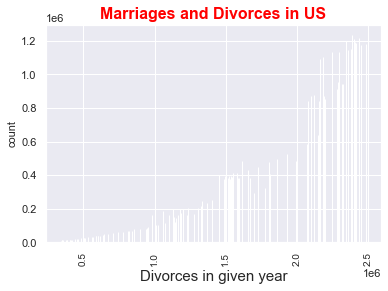

In [53]:
df = pd.read_csv('C:\\Users\\hp\\Desktop\\problemset\\us-marriages-divorces-1867-2014.csv')
df.head()
plt.bar(x=df['Marriages'],
 
        height=df['Divorces'])
plt.xticks(rotation=90,fontsize=10)
plt.xlabel('Divorces in given year', fontsize=15)
plt.ylabel('count',fontsize=11);
plt.title('Marriages and Divorces in US', fontsize=16, color='red',fontweight='bold')

# Question 8

Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!

Text(0.5, 1.0, 'Deadliest actors in Hollywood')

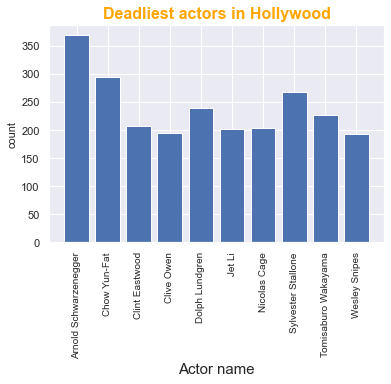

In [54]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

df = pd.read_csv('C:\\Users\hp\\Desktop\\problemset\\actor_kill_counts.csv')
df.head()
plt.bar(x=df['Actor'],
 
        height=df['Count'])
plt.xticks(rotation=90,fontsize=10)
plt.xlabel('Actor name', fontsize=15)
plt.ylabel('count',fontsize=11);
plt.title('Deadliest actors in Hollywood', fontsize=16, color='orange',fontweight='bold')

# Question 9

Create a pie chart showing the fraction of all Roman Emperors that were
assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the
percentage breakdown of the categories.

In [55]:
import pandas as pd
from matplotlib.pyplot import pie, axis, show
%matplotlib inline

df = pd.read_csv ('C:\\Users\\hp\\Desktop\\problemset\\roman-emperor-reigns.csv')


In [56]:
df

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide
...,...,...,...
63,Valentinian I,11.00,Natural causes
64,Valens,14.00,Killed in battle
65,Gratian,16.00,Assassinated
66,Valentinian II,17.00,Possibly assassinated


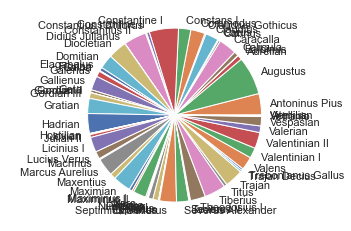

In [57]:
import pandas as pd
from matplotlib.pyplot import pie, axis, show
%matplotlib inline

df = pd.read_csv ('C:\\Users\\hp\\Desktop\\problemset\\roman-emperor-reigns.csv')

Assasinated_emperors = df.groupby(df["Emperor"])["Length_of_Reign"].sum()
axis('equal');
pie(Assasinated_emperors, labels=Assasinated_emperors.index);
show()

# Question 10

Create a scatter plot showing the relationship between the total revenue earned by
arcades and the number of Computer Science PhDs awarded in the U.S. between
2000 and 2009.

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
df  = pd.read_csv("C:\\Users\\hp\\Desktop\\problemset\\arcade-revenue-vs-cs-doctorates.csv")

In [59]:
df

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


<AxesSubplot:>

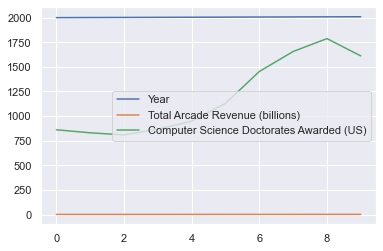

In [60]:
df.plot()

In [61]:
#install library packages
import plotly
import cufflinks as cf
import pandas as pd
import numpy as np
#enabling offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
#to display the plots
%matplotlib inline

In [62]:
#select columns in scatter plot chart
df[['Total Arcade Revenue (billions)','Computer Science Doctorates Awarded (US)']].iplot(kind = 'scatter', mode = 'markers')